<a href="https://colab.research.google.com/github/KaikMarques/Projeto_AnaliseDeDados_setor_Energia/blob/main/Case_Pr%C3%A1tico_de_An%C3%A1lise_de_Dados_no_Python_para_o_setor_de_Energia_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Contexto**
Em turbinas eólicas, os sistemas Scada medem e salvam dados como velocidade do vento, direção do vento, energia gerada, etc., em intervalos de 10 minutos. Este arquivo foi retirado do sistema scada de uma turbina eólica que está funcionando e gerando energia na Turquia.

### Conteudo do arquivo:

- Data/Hora (para intervalos de 10 minutos)
- LV ActivePower (kW): A potência gerada pela turbina naquele momento
- Velocidade do vento (m/s): A velocidade do vento na altura do cubo da turbina (a velocidade do vento que a turbina usa para geração de eletricidade)
- Curva_de_potência teórica (KWh): Os valores teóricos de potência que a turbina gera com a velocidade do vento fornecida pelo fabricante da turbina
- Direção do Vento (°): A direção do vento na altura do cubo da turbina (as turbinas eólicas giram nesta direção automaticamente)

# 0) Importanto Bibliotecas

#### Neste bloco, estamos importando as bibliotecas necessárias para a análise de dados, como o Pandas para manipulação de dados tabulares, Matplotlib para visualizações gráficas e Seaborn para gráficos estatísticos mais atraentes.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# 1) Lendo o Arquivo

#### Aqui, estamos lendo um arquivo CSV contendo dados relacionados a uma turbina eólica. O conjunto de dados é atribuído à variável turbina. Em seguida, realizamos algumas manipulações nos dados, renomeando colunas, convertendo a coluna 'Data/Hora' para o formato de data e hora, e exibindo os primeiros registros do DataFrame.

In [ ]:
turbina = pd.read_csv('T1.csv')
display(turbina)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


# Mudando o nome das colunas entre outros

In [ ]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/Hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'CurvaTeórica(KWh)', 'DireçãoVento(°)']
del turbina['DireçãoVento(°)']
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])
display(turbina)

,Data/Hora,ActivePower(kW),WindSpeed(m/s),CurvaTeórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


# 2) Plotando os dados em um gráfico - Real

#### Este bloco utiliza a biblioteca Seaborn para criar um gráfico de dispersão (scatter plot) dos dados reais da turbina. O eixo x representa a velocidade do vento, o eixo y representa a potência ativa gerada, e cada ponto no gráfico representa uma observação.

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kW)'>

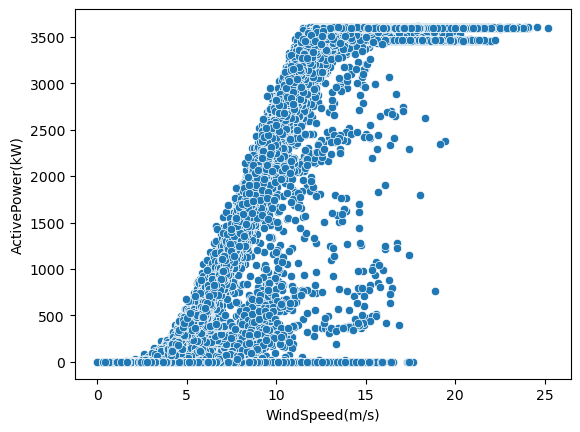

In [ ]:
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)')

# 3) Plotando os dados em um gráfico - Teórica

#### Semelhante ao bloco anterior, este bloco cria um gráfico de dispersão, mas desta vez representa a curva teórica de potência em relação à velocidade do vento.

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='CurvaTeórica(KWh)'>

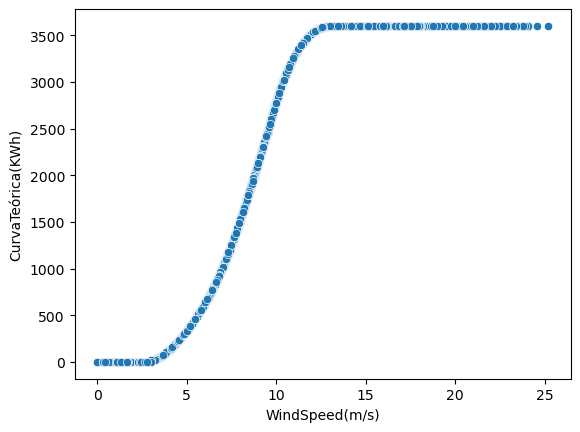

In [ ]:
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='CurvaTeórica(KWh)')

# 4) Criando "Limites Aceitáveis"

#### Aqui, estamos definindo limites aceitáveis para a potência teórica da turbina e comparando esses limites com a potência real. As análises são divididas em três categorias: dentro do limite, fora do limite e zero. A porcentagem de pontos dentro do limite é impressa.

In [ ]:
pot_real=turbina['ActivePower(kW)'].tolist()
pot_teorica=turbina['CurvaTeórica(KWh)'].tolist()

#Criando lista de potência máxima e minima
#Potencia máxima tem o valor da turbina teorica + 5%
#Potencia minima tem o valor da turbina teorica - 5%
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

# Tenho 3 analises: Quem está dentro; Quem está fora; Quem é zero.

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia ==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

print(dentro_limite.count('Dentro')/len(dentro_limite))

0.37286760340391845


# 5) Adicionando lista "Dentro_Limite" ao dataframe:

#### Aqui, estamos adicionando a lista dentro_limite como uma nova coluna chamada 'DentroLimite' ao DataFrame turbina.

In [ ]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,ActivePower(kW),WindSpeed(m/s),CurvaTeórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


# 6) Plotando novamente o gráfico:

#### Finalmente, este bloco utiliza o Seaborn para criar um gráfico de dispersão colorido com base na nova coluna 'DentroLimite'. Os pontos são coloridos de acordo com se estão dentro, fora ou zerados em relação aos limites aceitáveis.

<AxesSubplot:xlabel='WindSpeed(m/s)', ylabel='ActivePower(kW)'>

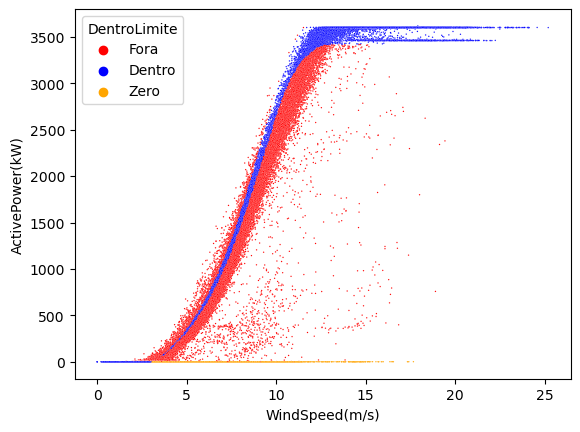

In [ ]:
cores = {'Dentro':'blue','Fora':'red','Zero':'orange'}
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='DentroLimite', s=1, palette=cores)


# O que posso ter com esta análise?

##### - Posso comunicar ao meu gestor que a turbina 1 está exibindo um comportamento incomum, apresentando duas faixas de máximo? Gostaria de entender a razão por trás desse fenômeno
##### - Existem muitos pontos que se destacam como atípicos, e isso ocorre mesmo em situações de velocidade do vento mais baixa
##### - Pode haver algum desajuste em um dos sensores do nosso anemômetro, o dispositivo responsável por medir a velocidade do vento na turbina? Estou interessado em investigar se essa possível desregulação está contribuindo para as discrepâncias nos resultados.
